In [5]:
### Library Imports
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from plotIndicators import plot_function
from getTickers import import_stock_data


In [6]:
### Load in Stock Data
tickers = ['AAPL', 'GOOG']
start_date = '2024-01-01'
stock_data = import_stock_data(tickers, start_date)
stock_data

[*********************100%%**********************]  2 of 2 completed


Price        Date       Close                    High                     Low  \
Ticker                   AAPL        GOOG        AAPL        GOOG        AAPL   
0      2024-01-02  185.639999  139.559998  188.440002  140.615005  183.889999   
1      2024-01-03  184.250000  140.360001  185.880005  141.089996  183.429993   
2      2024-01-04  181.910004  138.039993  183.089996  140.634995  180.880005   
3      2024-01-05  181.179993  137.389999  182.759995  138.809998  180.169998   
4      2024-01-08  185.559998  140.529999  185.600006  140.639999  181.500000   
..            ...         ...         ...         ...         ...         ...   
75     2024-04-19  165.000000  155.720001  166.399994  157.990005  164.080002   
76     2024-04-22  165.839996  157.949997  167.259995  159.184998  164.770004   
77     2024-04-23  166.899994  159.919998  167.050003  160.479996  164.919998   
78     2024-04-24  169.020004  161.100006  169.300003  161.389999  166.210007   
79     2024-04-25  169.889999  157.949997  170.610001  158.279999  168.151093   

Price               
Ticker        GOOG  
0       137.740005  
1       138.429993  
2       138.009995  
3       136.850006  
4       137.880005  
..             ...  
75      153.910004  
76      155.660004  
77      157.964996  
78      158.820007  
79      152.768005  

[80 rows x 7 columns]

In [7]:
### Function to Calculate CCI
def calculate_cci(df, window):
    # empty list init
    cci_last_row = []

    # Calculate Typical Price (TP) = (High + Low + Close) / 3
    typ_price = (df['High'] + df['Low'] + df['Close']) / 3 
    # Simple Moving Average (SMA) of TP
    sma = typ_price.rolling(window = window).mean()  
    # Mean Deviation (MD) = absolute difference between the TP and the SMA
    mean_dev = (typ_price - sma).abs().rolling(window=window).mean()  
    # Calculate Commodity Channel Index (CCI) = (TP - SMA) / (0.015 * MD)
    cci_df = (typ_price - sma) / (0.015 * mean_dev)
    
    # Append last two row values to cci_vals list
    cci_last_row.extend(cci_df.iloc[-1:].values)
    # extract just the final row of values
    cci_vals = np.array(cci_last_row[0])

    return cci_df, cci_vals

cci_df, cci_vals = calculate_cci(stock_data, window = 20)
print(cci_df.tail(5))
print("CCI values list: ", cci_vals)

Ticker        AAPL       GOOG
75     -128.386860   6.049671
76      -99.261369  21.564724
77      -85.691298  38.231072
78      -38.171002  46.731545
79        0.423988  -4.427973
CCI values list:  [ 0.42398806 -4.427973  ]


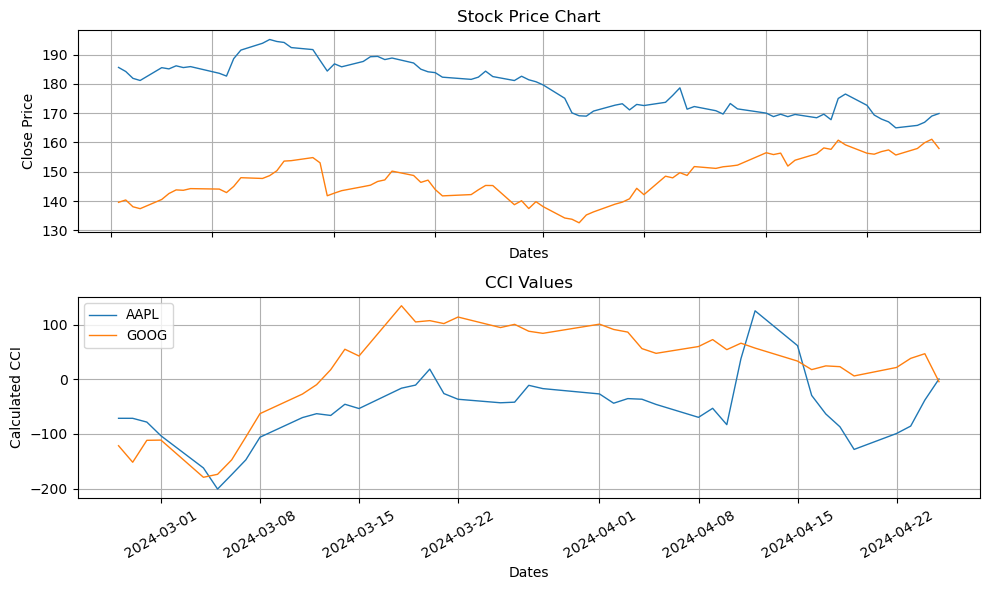

In [8]:
### Plot CCI
plot = plot_function(stock_data, cci_df, tickers, indicator_type = 'CCI')
plot
